In [ ]:
import numpy as np              # NumPy is a library for working with arrays of numerical data in Python. We import it as 'np'.
import pandas as pd             # Pandas is a library for data manipulation and analysis in Python. We import it as 'pd'.
import matplotlib.pyplot as plt # Matplotlib is a library for creating visualizations in Python. We import the pyplot module as 'plt'.
from sklearn.model_selection import train_test_split  # The train_test_split function from scikit-learn is used to split data into training and testing sets.
from sklearn.preprocessing import StandardScaler     # The StandardScaler class from scikit-learn is used to standardize feature data.
from sklearn.ensemble import RandomForestClassifier   # The RandomForestClassifier class from scikit-learn is used to perform random forest classification.
from sklearn.svm import SVC       # The SVC class from scikit-learn is used to perform Support Vector Machine classification.
from sklearn.neighbors import KNeighborsClassifier    # The KNeighborsClassifier class from scikit-learn is used to perform k-nearest neighbors classification.
from sklearn.ensemble import VotingClassifier        # The VotingClassifier class from scikit-learn is used to perform ensemble classification by combining the predictions of multiple classifiers.


In [ ]:
# The read_csv() function from pandas is used to read the data from a CSV file named 'data.csv' and create a pandas DataFrame object named 'df'. This function can read CSV files from a local file system or from a URL.
# Once the data is read, it can be manipulated using pandas' built-in functions and methods.
df = pd.read_csv('/content/cancer_data.csv')

In [ ]:
# The head() method of a pandas DataFrame object is used to display the first 5 rows of the DataFrame.
#It is useful for quickly inspecting the data to ensure that it has been read in correctly and that the column headers and data types are as expected. By default,
#the head() method displays the first 5 rows, but you can pass a number n to the method to display the first n rows.
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
# The drop() method of a pandas DataFrame object is used to remove one or more specified columns or rows from the DataFrame. In this case, the columns with the labels 'id' and 'Unnamed: 32' are removed from the DataFrame 'df'.
# The 'axis' parameter is set to 1, which means that the drop operation is performed on columns rather than rows. The resulting DataFrame is assigned back to the variable 'df'.
df = df.drop(['id', 'Unnamed: 32'], axis=1)

In [ ]:
# The head() method of a pandas DataFrame object is used to display the first 5 rows of the DataFrame.
#It is useful for quickly inspecting the data to ensure that the columns have been dropped as expected. By default, the head() method displays the first 5 rows, but you can pass a number n to the method to display the first n rows.
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
# The isnull() method of a pandas DataFrame object is used to identify missing or null values in the DataFrame.
# When this method is called on a DataFrame, it returns a DataFrame of the same shape as the original DataFrame, but with boolean values indicating whether each element is missing (True) or not missing (False).
#The sum() method is then called on this resulting DataFrame, which returns the total number of missing values for each column in the original DataFrame 'df'.
#This can be useful for identifying and handling missing data before performing any analysis or modeling.
df.isnull().sum()


diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [ ]:
# assigns a new DataFrame 'X' to the result of dropping the 'diagnosis' column from the original DataFrame 'df'.
#The 'axis' parameter is set to 1, which means that the drop operation is performed on columns.
#This is done because 'diagnosis' is the target variable that we want to predict and it should be separated from the other features used for prediction.
X = df.drop('diagnosis', axis=1)
# assigns a new Series 'y' to the 'diagnosis' column of the original DataFrame 'df'. This will be used as the target variable for training and testing the machine learning models.
y = df['diagnosis']
#  uses the train_test_split() function from scikit-learn to split the data into training and testing sets.
#The 'X' and 'y' data are split into 'X_train', 'X_test', 'y_train', and 'y_test', with a test size of 0.2 and a random state of 42. This means that 20% of the data will be used for testing,
#the random state ensures that the data is split in a reproducible way.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# The first two lines of code are used to convert the target variable 'y' from categorical to numerical values.
# In this case, 'M' (indicating malignant) is replaced with 1 and 'B' (indicating benign) is replaced with 0.
#This is necessary because most machine learning algorithms cannot handle categorical data directly, and require numerical values instead.
y[y == 'M'] = 1
y[y == 'B'] = 0
# code uses the astype() method of a pandas Series object to convert the data type of the 'y' variable from object (i.e. string) to integer.
# This is necessary because most machine learning algorithms require the target variable to be of numeric data type.
y = y.astype(int)

<ipython-input-12-833f1c52faab>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y == 'M'] = 1
<ipython-input-12-833f1c52faab>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y[y == 'B'] = 0


In [ ]:
from sklearn.preprocessing import LabelEncoder # imports the LabelEncoder class from the scikit-learn preprocessing module.
le = LabelEncoder()#  creates an instance of the LabelEncoder class and assigns it to the variable 'le'.
# fit_transform() method of the LabelEncoder is used object to encode the target variable 'y'.
#The fit_transform() method first fits the encoder to the target variable 'y', which means it learns the mapping between the unique values in 'y' and their corresponding integer labels.
#Then, it applies this mapping to transform 'y' into an array of integer labels. The resulting encoded variable 'y' can be used as input to a machine learning model.
y = le.fit_transform(y)





In [ ]:
scaler = StandardScaler() #creates an instance of the StandardScaler class from the scikit-learn preprocessing module.
#the fit_transform() method of the StandardScaler object to scale (i.e. standardize) the training features in 'X_train'.
#This involves centering the data (i.e. subtracting the mean) and scaling it (i.e. dividing by the standard deviation) so that each feature has a mean of 0 and a standard deviation of 1.
X_train = scaler.fit_transform(X_train)
#the transform() method of the StandardScaler object to scale the test features in 'X_test'.
#Importantly, we only call transform() on the test data, and not fit_transform().
#This is because we want to use the same scaling factors learned from the training data to scale the test data, so that the test data is not used to influence the scaling process.
X_test = scaler.transform(X_test)

In [ ]:
# Train a Random Forest + SVM model
#creates an instance of the RandomForestClassifier class from the scikit-learn ensemble module.
#The 'n_estimators' parameter specifies the number of trees in the random forest, and 'random_state' sets the seed for the random number generator.
rf = RandomForestClassifier(n_estimators=100, random_state=0)
#creates an instance of the SVC (Support Vector Classifier) class from the scikit-learn svm module.
# The 'kernel' parameter specifies the type of kernel to use in the SVM algorithm (in this case, a linear kernel), and 'C' specifies the penalty parameter of the error term in the SVM objective function.
#The 'random_state' parameter sets the seed for the random number generator.
svm = SVC(kernel='linear', C=1.0, random_state=0)
#creates an instance of the VotingClassifier class from the ensemble module.
#The 'estimators' parameter is a list of (name, estimator) pairs, where each estimator is a machine learning model that will be combined using the specified voting method ('hard' voting in this case).
rf_svm = VotingClassifier(estimators=[('rf', rf), ('svm', svm)], voting='hard')
rf_svm.fit(X_train, y_train)#fits the voting classifier to the training data using the fit() method.
rf_svm_acc = rf_svm.score(X_test, y_test)#calculates the accuracy of the voting classifier on the test data using the score() method.
rf_svm_acc #returns the calculated accuracy of the voting classifier on the test data.

0.9649122807017544

In [ ]:
# Train a Random Forest + k-NN model
#creates an instance of the RandomForestClassifier class from the scikit-learn ensemble module.
#The 'n_estimators' parameter specifies the number of trees in the random forest, and 'random_state' sets the seed for the random number generator.
rf = RandomForestClassifier(n_estimators=100, random_state=0)
# creates an instance of the KNeighborsClassifier class from the scikit-learn neighbors module.
#The 'n_neighbors' parameter specifies the number of neighbors to consider, 'metric' specifies the distance metric to use (in this case, the Minkowski distance), and 'p' specifies the power parameter for the Minkowski distance.
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
#creates an instance of the VotingClassifier class from the ensemble module.
#The 'estimators' parameter is a list of (name, estimator) pairs, where each estimator is a machine learning model that will be combined using the specified voting method ('hard' voting in this case).
rf_knn = VotingClassifier(estimators=[('rf', rf), ('knn', knn)], voting='hard')
rf_knn.fit(X_train, y_train)#fits the voting classifier to the training data using the fit() method.
rf_knn_acc = rf_knn.score(X_test, y_test)#calculates the accuracy of the voting classifier on the test data using the score() method.
rf_knn_acc#returns the calculated accuracy of the voting classifier on the test data.

0.956140350877193

In [ ]:
# Train a SVM + k-NN model
#creates an instance of the SVC class from the scikit-learn svm module.
#The 'kernel' parameter specifies the type of kernel function to be used ('linear' in this case), 'C' is the regularization parameter, and 'random_state' sets the seed for the random number generator.
svm = SVC(kernel='linear', C=1.0, random_state=0)
#creates an instance of the KNeighborsClassifier class from the scikit-learn neighbors module. The 'n_neighbors' parameter specifies the number of neighbors to consider (1 in this case),
# 'metric' specifies the distance metric to use (in this case, the Minkowski distance), and 'p' specifies the power parameter for the Minkowski distance.
knn = KNeighborsClassifier(n_neighbors=1, metric='minkowski', p=2)
#creates an instance of the VotingClassifier class from the ensemble module. The 'estimators' parameter is a list of (name, estimator) pairs,
# where each estimator is a machine learning model that will be combined using the specified voting method ('hard' voting in this case).
svm_knn = VotingClassifier(estimators=[('svm', svm), ('knn', knn)], voting='hard')
# fits the voting classifier to the training data using the fit() method.
svm_knn.fit(X_train, y_train)
# =calculates the accuracy of the voting classifier on the test data using the score() method.
svm_knn_acc = svm_knn.score(X_test, y_test)
#  returns the calculated accuracy of the voting classifier on the test data.
svm_knn_acc

0.9473684210526315

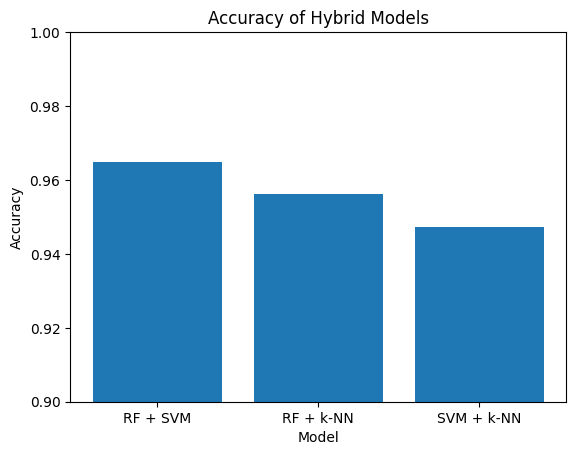

In [ ]:
# Plot the accuracy of the models
models = ['RF + SVM', 'RF + k-NN', 'SVM + k-NN']# creates a list of model names.
accuracies = [rf_svm_acc, rf_knn_acc, svm_knn_acc]# creates a list of accuracy scores for each model.
plt.bar(models, accuracies)# creates a bar chart using the pyplot module of matplotlib. The bar chart is created with the names of the models on the x-axis and the accuracy scores on the y-axis.
plt.ylim([0.9, 1])# sets the y-axis limits to be between 0.9 and 1.
plt.title('Accuracy of Hybrid Models')#  sets the title of the bar chart.
plt.xlabel('Model')#  sets the label for the x-axis.
plt.ylabel('Accuracy')# sets the label for the y-axis.
plt.show()#  line displays the bar chart.